# Importing Necesseties

In [1]:
!pip install -r ../resources/requirements.txt



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
# Any results you write to the current directory are saved as output.

**Below is a helper Function which generates random colors which can be used to give different colors to your plots.Feel free to use it**

In [3]:
data = pd.read_csv('../resources/data/Twitter_Emotion_Dataset.csv')
data

,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata..."
...,...,...
4396,love,"Tahukah kamu, bahwa saat itu papa memejamkan m..."
4397,fear,Sulitnya menetapkan Calon Wapresnya Jokowi di ...
4398,anger,"5. masa depannya nggak jelas. lha iya, gimana ..."
4399,happy,[USERNAME] dulu beneran ada mahasiswa Teknik U...


In [4]:
data['Num_word_tweet'] = data['tweet'].apply(lambda x: len(str(x).split()))  #Number Of words in main text
data.head()


,label,tweet,Num_word_tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",27
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",35
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,17
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",32
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata...",30


Let's look at the distribution of Meta-Features

* The number of words plot is really interesting ,the tweets having number of words greater than 150 are less likely to be part from happy, sadness or anger

In [5]:
data['mentions'] = data['tweet'].apply(
    lambda x: x.count('[USERNAME]') + x.count('username'))  #Number Of words in main text
data.head()


,label,tweet,Num_word_tweet,mentions
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",27,2
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",35,0
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,17,0
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",32,0
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata...",30,1


We can see some interesting trends here:
* Happy tweets have less mentions on other
* Anger,Happy and Sadness tweets are longer than fear and love


## Lets talk hashtags!

In [6]:
data['hashtags'] = data['tweet'].apply(lambda x: x.count('#'))  #Number Of words in main text
data.head()


,label,tweet,Num_word_tweet,mentions,hashtags
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",27,2,0
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",35,0,0
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,17,0,0
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",32,0,0
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata...",30,1,0


In [7]:
indo_stop_words = stopwords.words(fileids='indonesian')
indo_stop_words.append("username")
indo_stop_words.append("url")
indo_stop_words.append("ya")
indo_stop_words.append("yg")

In [8]:

data['stop_word_count'] = data['tweet'].apply(
    lambda x: len([w for w in str(x).lower().split() if w in indo_stop_words]))


## Lets see some of the most common words per category

B### Cleaning the Corpus
Now Before We Dive into extracting information out of words in text and selected text,let's first clean the data

In [9]:
data

,label,tweet,Num_word_tweet,mentions,hashtags,stop_word_count
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",27,2,0,4
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",35,0,0,12
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,17,0,0,2
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",32,0,0,6
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata...",30,1,0,7
...,...,...,...,...,...,...
4396,love,"Tahukah kamu, bahwa saat itu papa memejamkan m...",24,0,0,10
4397,fear,Sulitnya menetapkan Calon Wapresnya Jokowi di ...,35,0,4,10
4398,anger,"5. masa depannya nggak jelas. lha iya, gimana ...",30,0,1,7
4399,happy,[USERNAME] dulu beneran ada mahasiswa Teknik U...,35,1,0,9


t## Initial modal

In [10]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


data['tweet'] = data['tweet'].apply(lambda x: clean_text(x))
data

,label,tweet,Num_word_tweet,mentions,hashtags,stop_word_count
0,anger,soal jln jatibarupolisi tdk bs gertak gubernur...,27,2,0,4
1,anger,sesama cewe lho kayaknya harusnya bisa lebih r...,35,0,0,12
2,happy,kepingin gudeg mbarek bu hj amad foto dari goo...,17,0,0,2
3,anger,jln jatibarubagian dari wilayah tn abangpengat...,32,0,0,6
4,happy,sharing pengalaman aja kemarin jam batalin ti...,30,1,0,7
...,...,...,...,...,...,...
4396,love,tahukah kamu bahwa saat itu papa memejamkan ma...,24,0,0,10
4397,fear,sulitnya menetapkan calon wapresnya jokowi di ...,35,0,4,10
4398,anger,masa depannya nggak jelas lha iya gimana mau ...,30,0,1,7
4399,happy,dulu beneran ada mahasiswa teknik ui nembak p...,35,1,0,9


In [11]:
def remove_stopword(x):
    return " ".join([y for y in x.split() if y not in indo_stop_words])
data['tweet'] = data['tweet'].apply(lambda x: remove_stopword(x))

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

# Encode labels
encode_labels = LabelEncoder().fit_transform(data["label"])
# Train-test split
msg_train, msg_test, label_train, label_test = train_test_split(
    data.drop(columns=["label"]), encode_labels, test_size=0.1, random_state=42
)

# Suppose df has columns 'tweet' (text) and various numeric feature columns
text_col = 'tweet'
meta_cols = ['Num_word_tweet', 'mentions', 'hashtags', 'punctuation_count',
             'char_count', 'unique_word_count', 'stop_word_count', 'url_count']

preprocessor = ColumnTransformer([
    ('tfidf', TfidfVectorizer(), text_col),
    ('meta', StandardScaler(), meta_cols),
], remainder='drop')

pipeline = Pipeline([
    ('features', preprocessor),
    ('classifier', XGBClassifier(random_state=42)), ])

# Train & evaluate
pipeline.fit(msg_train, label_train)
predictions = pipeline.predict(msg_test)
print("Accuracy:", accuracy_score(label_test, predictions))
print(classification_report(label_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(label_test, predictions))


ValueError: A given column is not a column of the dataframe

## Trying basic NN

In [472]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class TextMetaClassifier(nn.Module):
    def __init__(self, text_input_dim, meta_input_dim, hidden_dim, output_dim):
        super().__init__()
        # Branch for text features
        self.text_fc = nn.Linear(text_input_dim, hidden_dim)
        # Branch for metadata features
        self.meta_fc = nn.Linear(meta_input_dim, hidden_dim)
        # Combined layers

        self.combined_fc1 = nn.Linear(hidden_dim * 2, hidden_dim)
        self.combined_fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, text_x, meta_x):
        # text_x: (batch_size, text_input_dim)
        # meta_x: (batch_size, meta_input_dim)
        t1 = F.relu(self.text_fc(text_x))
        m = F.relu(self.meta_fc(meta_x))
        # Concatenate along feature dimension
        x = torch.cat((t1, m), dim=1)
        x = F.relu(self.combined_fc1(x))
        out = self.combined_fc2(x)
        return out


In [473]:
from sklearn.preprocessing import MinMaxScaler

num_cols = data.select_dtypes(include=['int', 'float']).columns
scaler = MinMaxScaler()

data[num_cols] = scaler.fit_transform(data[num_cols])


In [474]:
data

,label,tweet,Num_word_tweet,mentions,hashtags,punctuation_count,char_count,unique_word_count,url_count,stop_word_count
0,anger,jln jatibarupolisi tdk bs gertak gubernur eman...,0.320513,0.1250,0.000000,0.166667,0.426230,0.333333,0.5,0.129032
1,anger,cewe lho kayaknya rasain sibuk jaga rasain sak...,0.423077,0.0000,0.000000,0.100000,0.456967,0.449275,0.0,0.387097
2,happy,kepingin gudeg mbarek bu hj amad foto google s...,0.192308,0.0000,0.000000,0.066667,0.213115,0.217391,0.0,0.064516
3,anger,jln jatibarubagian wilayah tn abangpengaturan ...,0.384615,0.0000,0.000000,0.155556,0.487705,0.420290,0.5,0.193548
4,happy,sharing pengalaman aja kemarin jam batalin tik...,0.358974,0.0625,0.000000,0.111111,0.391393,0.391304,0.0,0.225806
...,...,...,...,...,...,...,...,...,...,...
4396,love,tahukah papa memejamkan matanya menahan gejola...,0.282051,0.0000,0.000000,0.044444,0.319672,0.289855,0.0,0.322581
4397,fear,sulitnya menetapkan calon wapresnya jokowi pil...,0.423077,0.0000,0.266667,0.066667,0.524590,0.449275,0.0,0.322581
4398,anger,depannya nggak lha iya gimana coba lulusan sen...,0.358974,0.0000,0.066667,0.144444,0.385246,0.376812,0.0,0.225806
4399,happy,beneran mahasiswa teknik ui nembak pacarnya pa...,0.423077,0.0625,0.000000,0.100000,0.479508,0.449275,0.0,0.290323


In [475]:
tfidfVectorizer = TfidfVectorizer().fit(data[text_col])

In [478]:
train_data, test_data, label_train, label_test = train_test_split(
    data.drop(columns=["label"]), encode_labels, test_size=0.2, random_state=42
)

In [479]:
def prepare_data_to_nn(data, labels):
    meta_array = data[meta_cols].to_numpy()
    tfidf_array = tfidfVectorizer.transform(data[text_col]).toarray()
    one_hot_tensor_label = pd.get_dummies(labels).to_numpy(dtype="long")
    return meta_array, tfidf_array, one_hot_tensor_label


In [480]:
import numpy as np
from torch.utils.data import Dataset, DataLoader


class TextMetaDataset(Dataset):
    def __init__(self, text_feats, meta_feats, labels):
        self.text_feats = torch.tensor(text_feats, dtype=torch.float32)
        self.meta_feats = torch.tensor(meta_feats, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.float32)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.text_feats[idx], self.meta_feats[idx], self.labels[idx]


tfidf_array_train, meta_array_train, one_hot_tensor_label_train = prepare_data_to_nn(train_data, label_train)
train_ds = TextMetaDataset(tfidf_array_train, meta_array_train, one_hot_tensor_label_train)
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)

tfidf_arra_testy, meta_array_test, one_hot_tensor_label_test = prepare_data_to_nn(test_data, label_test)
test_ds = TextMetaDataset(tfidf_arra_testy, meta_array_test, one_hot_tensor_label_test)
test_loader = DataLoader(test_ds, batch_size=len(label_test))

In [481]:
model = TextMetaClassifier(tfidf_array_train.shape[1], meta_array_train.shape[1], hidden_dim=128,
                           output_dim=len(set(data["label"])))
optimizer = torch.optim.Adagrad(model.parameters(), lr=1e-3)
criterion = nn.BCEWithLogitsLoss()

In [482]:
losses_train = []
acc_train = []
acc_val = []
for epoch in range(1000):
    model.train()
    losses_batch = []
    acc_batch = []
    for text_x, meta_x, y in train_loader:
        optimizer.zero_grad()
        outputs = model(text_x, meta_x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        losses_batch.append(loss.item())  # convert to numbers (0/1)
        acc_batch.append(100 * torch.mean(
            (torch.argmax(y, axis=1) == np.argmax(y, axis=1)).float()).item())
    acc_train.append(np.mean(acc_batch))
    losses_train.append(np.mean(losses_batch))
    # test accuracy
    model.eval()
    text_x, meta_x, y = next(iter(test_loader))  # extract X,y from test dataloader
    with torch.no_grad():  # deactivates autograd
        yHat = model(text_x, meta_x)
    acc_val.append(
        100 * torch.mean((torch.argmax(yHat, axis=1) == np.argmax(one_hot_tensor_label_test, axis=1)).float()))

    print(f'Epoch {epoch + 1}, Loss: {loss.item():.4f}')


Epoch 1, Loss: 0.5249
Epoch 2, Loss: 0.5080
Epoch 3, Loss: 0.5070
Epoch 4, Loss: 0.4850
Epoch 5, Loss: 0.4903
Epoch 6, Loss: 0.4808
Epoch 7, Loss: 0.4928
Epoch 8, Loss: 0.4946
Epoch 9, Loss: 0.4761
Epoch 10, Loss: 0.4685
Epoch 11, Loss: 0.4960
Epoch 12, Loss: 0.4939
Epoch 13, Loss: 0.4655
Epoch 14, Loss: 0.4745
Epoch 15, Loss: 0.4614
Epoch 16, Loss: 0.4690
Epoch 17, Loss: 0.4300
Epoch 18, Loss: 0.4269
Epoch 19, Loss: 0.4526
Epoch 20, Loss: 0.4347
Epoch 21, Loss: 0.4383
Epoch 22, Loss: 0.4254
Epoch 23, Loss: 0.4341
Epoch 24, Loss: 0.4211
Epoch 25, Loss: 0.4095
Epoch 26, Loss: 0.3976
Epoch 27, Loss: 0.3872
Epoch 28, Loss: 0.3836
Epoch 29, Loss: 0.3517
Epoch 30, Loss: 0.3376
Epoch 31, Loss: 0.3365
Epoch 32, Loss: 0.3297
Epoch 33, Loss: 0.3673
Epoch 34, Loss: 0.3369
Epoch 35, Loss: 0.3258
Epoch 36, Loss: 0.3093
Epoch 37, Loss: 0.3014
Epoch 38, Loss: 0.2961
Epoch 39, Loss: 0.3249
Epoch 40, Loss: 0.3042
Epoch 41, Loss: 0.2644
Epoch 42, Loss: 0.2658
Epoch 43, Loss: 0.2541
Epoch 44, Loss: 0.26

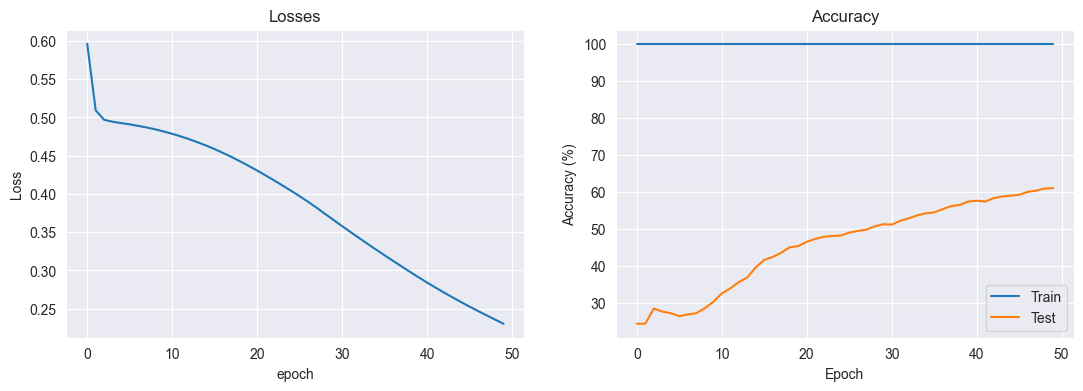

In [483]:
fig, ax = plt.subplots(1, 2, figsize=(13, 4))

ax[0].plot(losses_train)
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(acc_train, label='Train')
ax[1].plot(acc_val, label='Test')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_xlabel('Epoch')
ax[1].set_title('Accuracy')
ax[1].legend()
plt.show()

# End Notes
Kaggle always provide a lot of days for a competition which one can utilize to learn and grow.As Promised I have presented my first model,along with explanation,you can read spacy's documentation and Rohit singh's kernel as all the code comes from their.If you understand any part of code feel free to comment and ask,I will try to resolve it.
As This is my first competition I am also learning along the way ,I will be back with more original ideas and some great more models as I learn more and more about question/answering , different other texhniques , various forms of BERT and Data itself

** Thanks for the enormous love and appreciation , I'm Sorry that I have not updated the kernel with Q and A approach,I'm Still learning all the techniques required , will update soon!**
<br><br>STAY TUNED!

<span style="color:Red"> I hope you Liked my kernel. An upvote is a gesture of appreciation and encouragement that fills me with energy to keep improving my efforts ,be kind to show one ;-)